In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px

In [2]:
df = pd.read_csv("ds_salaries.csv", index_col= 0)

In [3]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# Exploración de la base de datos
## Calcula medidas estadísticas
### Variables cuantitativas
Medidas de tendencia central: promedio, media, mediana y moda de los datos.

Medidas de dispersión: rango: máximo - mínimo, varianza, desviación estándar.

### Variables cualitativas
Tabla de distribución de frecuencia
Moda

In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [6]:
df.corr()

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


# Explora los datos usando herramientas de visualización
## Variables cuantitativas:
### Medidas de posición: cuartiles, outlier (valores atípicos), boxplots
Análisis de distribución de los datos (Histogramas). 
Identificar si tiene forma simétrica o asimétrica

## Variables categóricas
# Distribución de los datos (diagramas de barras, diagramas de pastel)

Identifica problemas de calidad de datos (registros duplicados, valores faltantes, outliers, etc).

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd83fc15f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd83fc21a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd83fc159d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd83fc28510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd83fc52f90>],
 'means': []}

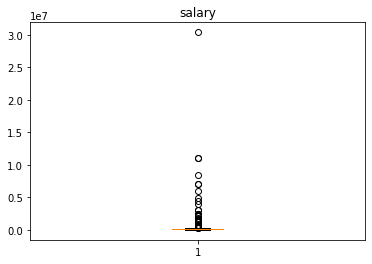

In [7]:
plt.title('salary')
plt.boxplot(df.salary) 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd83f76f810>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd83f781690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd83f7810d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd83f70b3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd83f70b910>],
 'means': []}

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


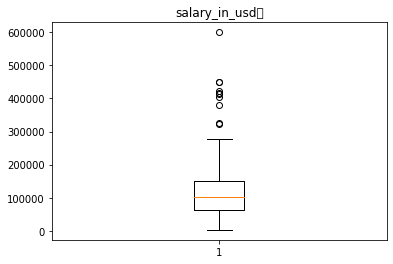

In [8]:
plt.title('salary_in_usd	')
plt.boxplot(df.salary_in_usd	) 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd83f6f9510>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd83f689610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd83f684d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd83f68f0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd83f68f610>],
 'means': []}

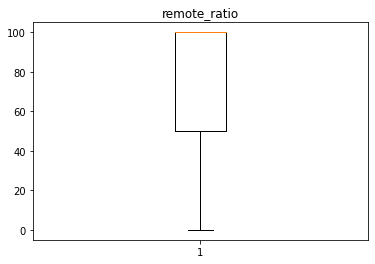

In [9]:
plt.title('remote_ratio')
plt.boxplot(df.remote_ratio) 

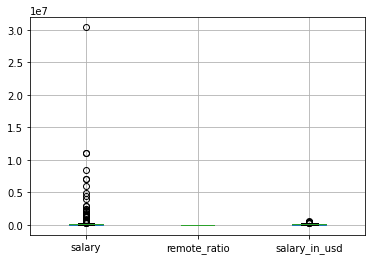

In [10]:
df.boxplot(column=['salary', 'remote_ratio', 'salary_in_usd'])

In [11]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [12]:
for column in df:
    print(df[column].unique())

[2020 2021 2022]
['MI' 'SE' 'EN' 'EX']
['FT' 'CT' 'PT' 'FL']
['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Sc

[]

<Figure size 1080x720 with 0 Axes>

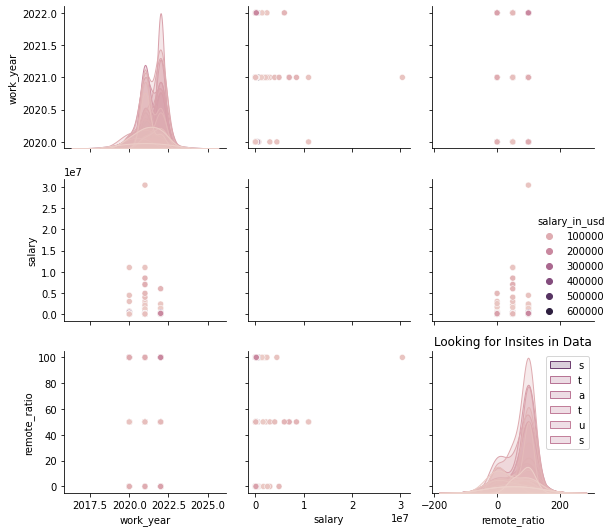

In [13]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="salary_in_usd")
plt.title("Looking for Insites in Data")
plt.legend("status")
plt.tight_layout()
plt.plot()

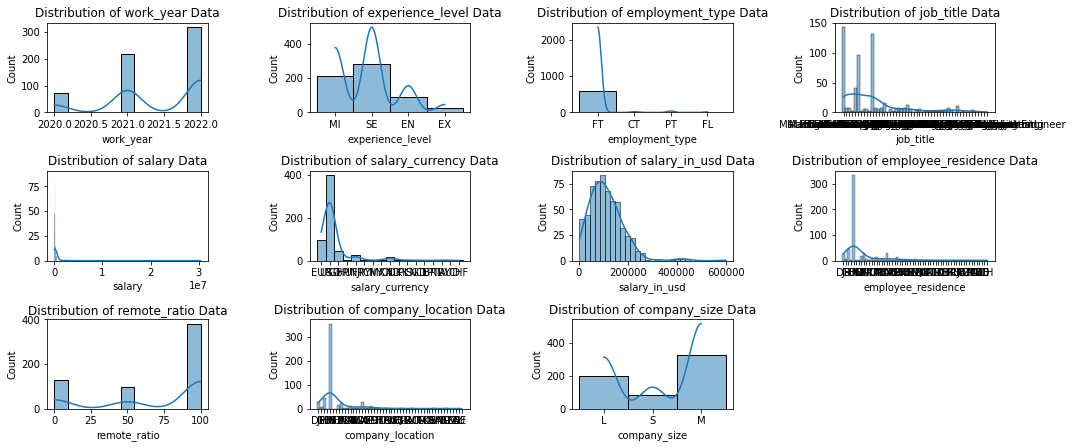

In [14]:
plt.figure(figsize=(15,10))

for i,col in enumerate(df.columns,1):
  plt.subplot(5,4,i)
  plt.title(f"Distribution of {col} Data")
  sns.histplot(df[col],kde=True)
  plt.tight_layout()
  plt.plot()

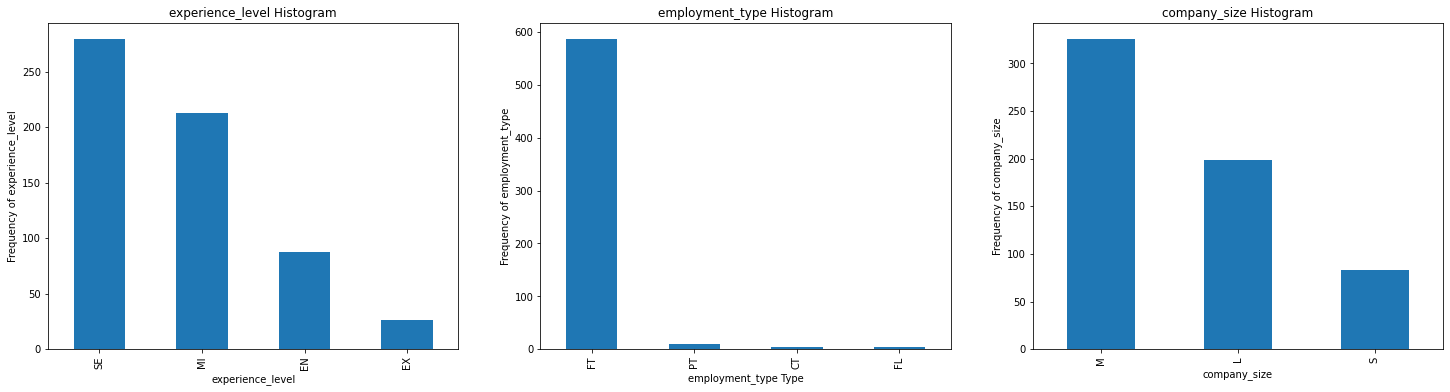

In [15]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.experience_level.value_counts().plot(kind = 'bar')
plt.title('experience_level Histogram')
plt1.set(xlabel = 'experience_level', ylabel='Frequency of experience_level')
plt.subplot(1,3,2)
plt1 = df.employment_type.value_counts().plot(kind = 'bar')
plt.title('employment_type Histogram')
plt1.set(xlabel = 'employment_type Type', ylabel='Frequency of employment_type')
plt.subplot(1,3,3)
plt1 = df.company_size.value_counts().plot(kind = 'bar')
plt.title('company_size Histogram')
plt1.set(xlabel = 'company_size', ylabel='Frequency of company_size')
plt.show()

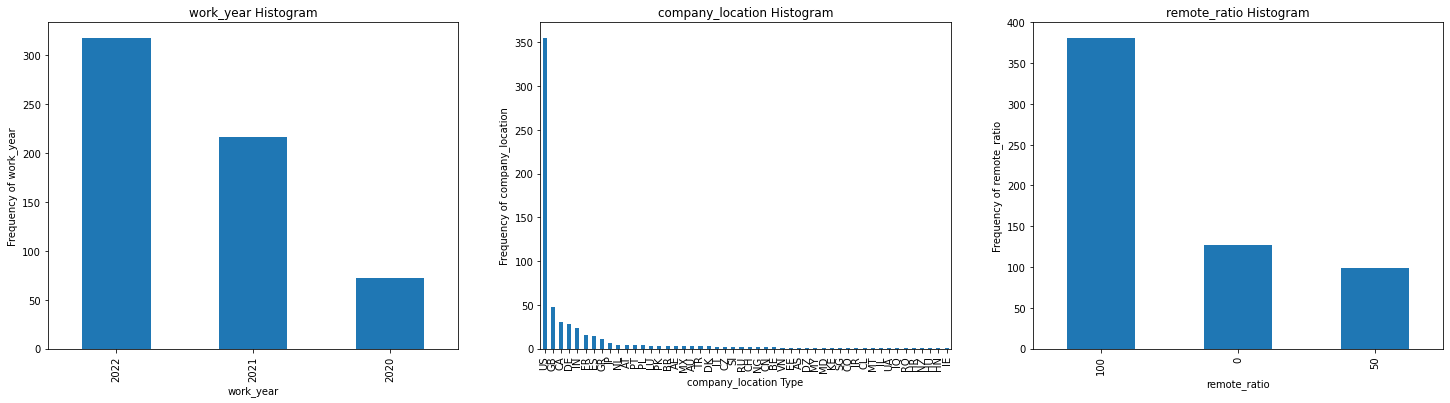

In [16]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.work_year.value_counts().plot(kind = 'bar')
plt.title('work_year Histogram')
plt1.set(xlabel = 'work_year', ylabel='Frequency of work_year')
plt.subplot(1,3,2)
plt1 = df.company_location.value_counts().plot(kind = 'bar')
plt.title('company_location Histogram')
plt1.set(xlabel = 'company_location Type', ylabel='Frequency of company_location')
plt.subplot(1,3,3)
plt1 = df.remote_ratio.value_counts().plot(kind = 'bar')
plt.title('remote_ratio Histogram')
plt1.set(xlabel = 'remote_ratio', ylabel='Frequency of remote_ratio')
plt.show()

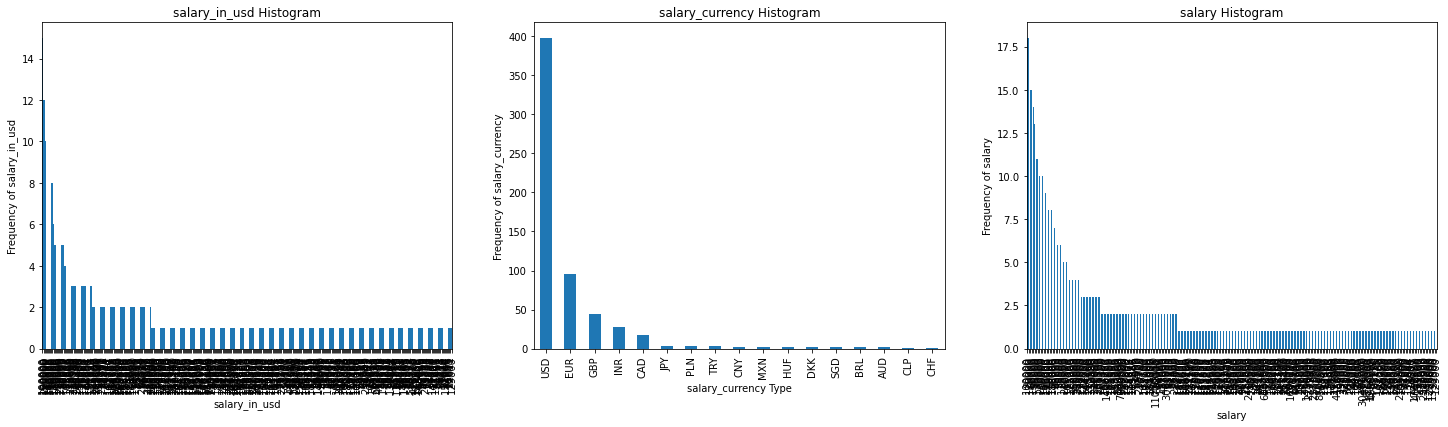

In [17]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.salary_in_usd.value_counts().plot(kind = 'bar')
plt.title('salary_in_usd Histogram')
plt1.set(xlabel = 'salary_in_usd', ylabel='Frequency of salary_in_usd')
plt.subplot(1,3,2)
plt1 = df.salary_currency.value_counts().plot(kind = 'bar')
plt.title('salary_currency Histogram')
plt1.set(xlabel = 'salary_currency Type', ylabel='Frequency of salary_currency')
plt.subplot(1,3,3)
plt1 = df.salary.value_counts().plot(kind = 'bar')
plt.title('salary Histogram')
plt1.set(xlabel = 'salary', ylabel='Frequency of salary')
plt.show()

# Identifica problemas de calidad de datos (registros duplicados, valores faltantes, outliers, etc).

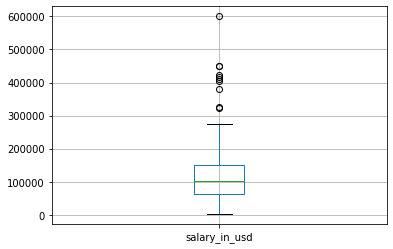

In [18]:
df.boxplot(column=['salary_in_usd'])

In [19]:
cols = ['salary_in_usd']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

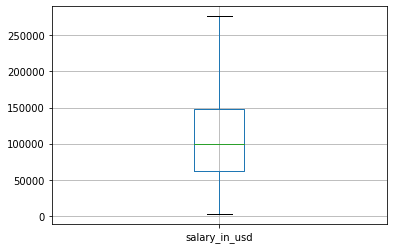

In [20]:
df.boxplot(column=['salary_in_usd'])

In [23]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,597.000000,5.970000e+02,597.000000,597.000000
mean,2021.412060,3.224171e+05,107168.855946,70.686767
std,0.688634,1.557181e+06,58555.516292,40.797800
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.999900e+04,62649.000000,50.000000
50%,2022.000000,1.129000e+05,100000.000000,100.000000
75%,2022.000000,1.600000e+05,148261.000000,100.000000
max,2022.000000,3.040000e+07,276000.000000,100.000000


De acuerdo con la información obtenida, una estimación del salario al que puede aspirar un científico de datos es de $107,168 dólares.

In [25]:
df.groupby("company_location", sort = True)["salary_in_usd"].mean()

company_location
AE    100000.000000
AS     18053.000000
AT     72920.750000
AU    108042.666667
BE     85699.000000
BR     18602.666667
CA     99823.733333
CH     64114.000000
CL     40038.000000
CN     71665.500000
CO     21844.000000
CZ     50937.000000
DE     81887.214286
DK     54386.333333
DZ    100000.000000
EE     32974.000000
ES     53060.142857
FR     63970.666667
GB     81583.042553
GR     52293.090909
HN     20000.000000
HR     45618.000000
HU     35735.000000
IE     71444.000000
IL    119059.000000
IN     28581.750000
IQ    100000.000000
IR      4000.000000
IT     36366.500000
JP    114127.333333
KE      9272.000000
LU     43942.666667
MD     18000.000000
MT     28369.000000
MX     32123.333333
MY     40000.000000
NG     30000.000000
NL     54945.750000
NZ    125000.000000
PK     13333.333333
PL     66082.500000
PT     47793.750000
RO     60000.000000
RU    157500.000000
SG     89294.000000
SI     63831.000000
TR     20096.666667
UA     13400.000000
US    136100.342029
VN 

El país que más paga es Rusia con un promedio de $157,500 dólares de media.

In [26]:
df.groupby("experience_level", sort = True)["salary_in_usd"].mean()

experience_level
EN     61643.318182
EX    159963.318182
MI     82953.142857
SE    135797.263538
Name: salary_in_usd, dtype: float64

El nivel de experiencia sí influye en el salario ya que los Expertos o Directores son los que tienen mejores salarios, en promedio.

# Preparación de los datos:
Selecciona el conjunto de datos a utilizar.
Decide qué conjunto de datos se utilizará. Identifica variables objetivo. En caso necesario, explica por qué se incluyeron o excluyeron variables.
Maneja datos categóricos: transforma a datos numéricos si es necesario.
En caso de necesidad de recorte de datos (atípicos, faltantes, duplicados, etc), explica el motivo de la reducción.
Maneja apropiadamente datos atípicos.
Transforma los datos en caso necesario.
Revisa si es necesario discretizar los datos
Revisa si es necesario escalar y normalizar los datos
Construye atributos si es conveniente

In [21]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.drop(['column_nameA', 'column_nameB'], axis=1, inplace=True)

In [ ]:
df.drop('salary_currency', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           555 non-null    int64 
 1   experience_level    555 non-null    object
 2   employment_type     555 non-null    object
 3   job_title           555 non-null    object
 4   salary_in_usd       555 non-null    int64 
 5   employee_residence  555 non-null    object
 6   remote_ratio        555 non-null    int64 
 7   company_location    555 non-null    object
 8   company_size        555 non-null    object
dtypes: int64(3), object(6)
memory usage: 43.4+ KB


In [ ]:
string_col = ['employment_type', 'work_year', 'company_size', 'employee_residence', 'company_location', 'job_title']

In [ ]:
df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False)
df_nontree.head()

,experience_level,salary_in_usd,remote_ratio,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,work_year_2020,work_year_2021,work_year_2022,...,job_title_Machine Learning Manager,job_title_Machine Learning Scientist,job_title_Marketing Data Analyst,job_title_NLP Engineer,job_title_Principal Data Analyst,job_title_Principal Data Engineer,job_title_Principal Data Scientist,job_title_Product Data Analyst,job_title_Research Scientist,job_title_Staff Data Scientist
0,MI,79833,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SE,260000,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,SE,109024,50,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MI,20000,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,SE,150000,50,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_nontree.iloc[:,df_nontree.columns != 'experience_level']
y = df_nontree.experience_level

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
train_acc = model.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 53.36538461538461


In [ ]:
y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 46.76258992805755


Text(0.5, 33.0, 'Predicted Values')

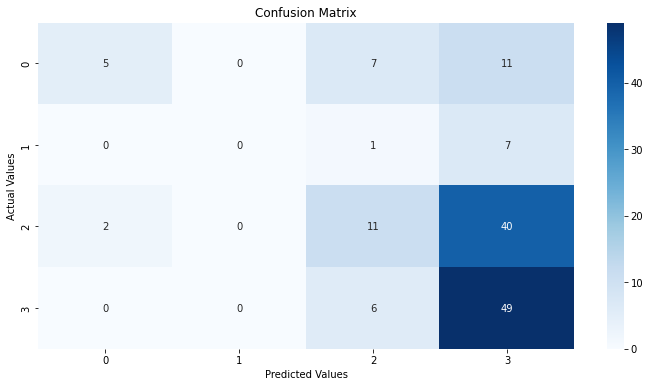

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
#plt.savefig('confusion_matrix.png')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          EN       0.71      0.22      0.33        23
          EX       0.00      0.00      0.00         8
          MI       0.44      0.21      0.28        53
          SE       0.46      0.89      0.60        55

    accuracy                           0.47       139
   macro avg       0.40      0.33      0.31       139
weighted avg       0.47      0.47      0.40       139



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
print(cm)
print(ac)
print(classification_report(y_test,y_pred))

[[ 0  0 21  2]
 [ 0  0  2  6]
 [ 0  0 34 19]
 [ 0  0 13 42]]
0.5467625899280576
              precision    recall  f1-score   support

          EN       0.00      0.00      0.00        23
          EX       0.00      0.00      0.00         8
          MI       0.49      0.64      0.55        53
          SE       0.61      0.76      0.68        55

    accuracy                           0.55       139
   macro avg       0.27      0.35      0.31       139
weighted avg       0.43      0.55      0.48       139



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
print(cm)
print(ac)
print(classification_report(y_test,y_pred))

[[10  0  9  4]
 [ 0  0  4  4]
 [14  0 25 14]
 [ 4  3 14 34]]
0.49640287769784175
              precision    recall  f1-score   support

          EN       0.36      0.43      0.39        23
          EX       0.00      0.00      0.00         8
          MI       0.48      0.47      0.48        53
          SE       0.61      0.62      0.61        55

    accuracy                           0.50       139
   macro avg       0.36      0.38      0.37       139
weighted avg       0.48      0.50      0.49       139



In [ ]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 90160.00
|   |--- feature_0 <= 59651.50
|   |   |--- feature_129 <= 0.50
|   |   |   |--- feature_88 <= 0.50
|   |   |   |   |--- feature_1 <= 25.00
|   |   |   |   |   |--- feature_103 <= 0.50
|   |   |   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |--- class: MI
|   |   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 41623.50
|   |   |   |   |   |   |   |   |   |--- feature_89 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: EN
|   |   |   |   |   |   |   |   |   |--- feature_89 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: MI
|   |   |   |   |   |   |   |   |--- feature_0 >  41623.50
|   |   |   |   |   |   |   |   |   |--- class: MI
|   |   |   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |   |   |--- class: EN
|   |   |   |   |   |--- feature_103 >  0.50
|   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |